In [1]:
from sklearn import metrics, datasets,model_selection,svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the iris data
data  = datasets.load_iris()

# seperate out the data and the target in X and y respectively
X = data.data
y = data.target


In [2]:
# split the data into 70:30
Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3, random_state=5)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)
# create the svm model
svm_model = svm.SVC(kernel="linear",gamma='scale',C=2)
# train the model
svm_model = svm_model.fit(Xtrain,ytrain)
# predict the testing data labels
ypred = svm_model.predict(Xtest)
# classification report
report = metrics.classification_report(ypred,ytest)
print(report)



(105, 4) (105,)
(45, 4) (45,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [3]:
import pandas as pd
import numpy as np

data= pd.read_csv("/content/diabetes.csv")
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# X will be holding all the feature columns
X = data.drop('Outcome',axis=1,inplace=False)

# y will be holding all the labels column
y = data['Outcome']


# split the data into 70:30 ratio
Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=5)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

# create the svm classifier
dibts_svm_model = svm.SVC(kernel='poly',gamma='scale',C=2)

# train the model
dibts_svm_model = dibts_svm_model.fit(Xtrain,ytrain)

# predict the labels
ypred = dibts_svm_model.predict(Xtest)

# accuracy
acc = metrics.accuracy_score(ypred,ytest)
print("accuracy:", acc)

conf_mat = metrics.confusion_matrix(ypred,ytest)
print("confusion matrix")
print()
print(conf_mat)



(537, 8) (537,)
(231, 8) (231,)
accuracy: 0.7878787878787878
confusion matrix

[[140  29]
 [ 20  42]]


In [5]:
# perform the EDA on the diabetes dataset
# Exploratory Data Analysis
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Age_category', ylabel='count'>

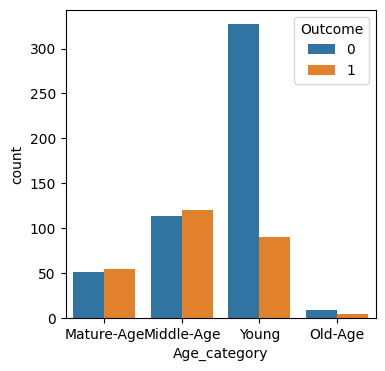

In [6]:
import seaborn as sns
data['Age_category'] =data['Age'].copy()
ind = data['Age']<=30
data.loc[ind,'Age_category'] = "Young"
ind = (data['Age']<=45) & (data['Age']>30)
data.loc[ind,'Age_category'] = "Middle-Age"
ind = (data['Age']<=65) & (data['Age']>45)
data.loc[ind,'Age_category'] = "Mature-Age"
ind = (data['Age']>65)
data.loc[ind,'Age_category'] = "Old-Age"
data.head()
plt.figure(1,(4,4))
sns.countplot(data=data,x='Age_category',hue='Outcome')



In [7]:
import pandas as pd
import numpy as np

data= pd.read_csv("/content/diabetes.csv")
print(data.shape)
data.head()
# X will be holding all the feature columns
X = data.drop('Outcome',axis=1,inplace=False)

# y will be holding all the labels column
y = data['Outcome']


# split the data into 70:30 ratio
Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=5)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

ker = ['poly','linear','rbf']
c_value = [1,2,3]

# pre allocation of the result variable
result = np.zeros((len(ker),len(c_value)))
for i in range(len(ker)):
  for j in range(len(c_value)):
    # create the svm classifier
    dibts_svm_model = svm.SVC(kernel=ker[i],gamma='scale',C=c_value[j])

    # train the model
    dibts_svm_model = dibts_svm_model.fit(Xtrain,ytrain)

    # predict the labels
    ypred = dibts_svm_model.predict(Xtest)

    # accuracy
    acc = metrics.accuracy_score(ypred,ytest)
    #print("accuracy:", acc)
    result[i,j]=acc
print(result)

ResultDF = pd.DataFrame(result,index=ker,columns=["C=1","C=2","C=3"])

(768, 9)
(537, 8) (537,)
(231, 8) (231,)
[[0.78787879 0.78787879 0.77922078]
 [0.7965368  0.7965368  0.7965368 ]
 [0.78354978 0.77489177 0.76623377]]


         poly    linear       rbf
C=1  0.787879  0.796537  0.783550
C=2  0.787879  0.796537  0.774892
C=3  0.779221  0.796537  0.766234


<Axes: >

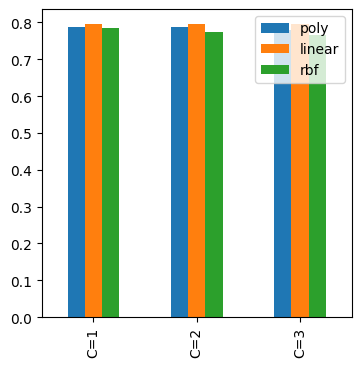

In [8]:
ResultDF = pd.DataFrame(result,index=ker,columns=["C=1","C=2","C=3"])
ResultDF = ResultDF.T
print(ResultDF)
ResultDF.plot(kind='bar',figsize=(4,4))